<a href="https://colab.research.google.com/github/Stitaprajna/AllMyProjects/blob/main/Fake%20News%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier

In [2]:
import pandas as pd

In [37]:
df = pd.read_csv('/content/train.csv',encoding = 'utf-8')

In [38]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [39]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [40]:
df.groupby('label')['label'].agg('count')

label
0    10387
1    10413
Name: label, dtype: int64

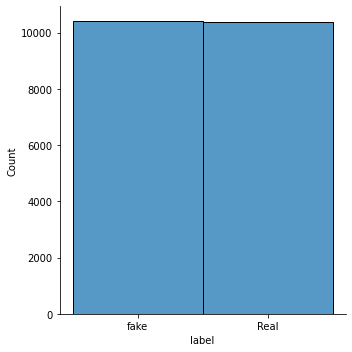

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt
DF = df.copy()
replace = {0:'Real',1:'fake'}
DF['label'] = DF['label'].replace(replace)
sn.displot(DF['label'])
plt.show()

This is definitely not an **imbalanced dataset**, so accuracy metric will be a good measure for evaluation. But, still **AUC** is a good evaluation metrics. So, we will evaluate 'Accuarcy', 'Precision', 'AUC' metric to select the best model.

# Using Multinomail Naive-Bayes & Passive-Aggresive Classifier (ML approach)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [42]:
import nltk
import re

In [43]:
df = df.dropna()

In [44]:
df.reset_index(inplace=True)

In [45]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [46]:
from nltk.stem import WordNetLemmatizer

In [47]:
lr = WordNetLemmatizer()
ps = PorterStemmer()

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# (i) Using title as feature

Here we will use only the 'News Headline' for training and testing. Lets see how the evaluation metrics perform here.

### Naive Bayes

In [14]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(str(word)) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [16]:
from sklearn.model_selection import train_test_split
y = df.label

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
model = naive_bayes.fit(x_train,y_train)

In [19]:
from sklearn import metrics
y_pred = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
import seaborn as sn

Model: Multinomial Naive-Bayes
Accuracy: 0.9017499088589136
Precision: 0.8733466933867735
AUC: 0.902348183690418


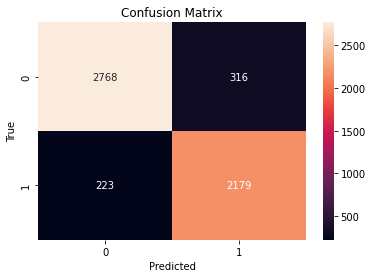

In [20]:
print('Model: Multinomial Naive-Bayes')
print('Accuracy:',model.score(x_test,y_test))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('AUC:',metrics.roc_auc_score(y_test,y_pred ))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()   

The result is good but we can perform better, so lets check how the next classifier performs. 

### Passive Aggresive Classifier





In [21]:
# PassiveAgressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
Passive_Aggressive_model = PassiveAggressiveClassifier()
model12 = Passive_Aggressive_model.fit(x_train,y_train)
y_pred_PAC = model12.predict(x_test)
CM = metrics.confusion_matrix(y_test, y_pred_PAC)

Model: Passive-Agressive Classifier
Accuracy: 0.9163324826831936
Precision: 0.8733466933867735
AUC: 0.902348183690418


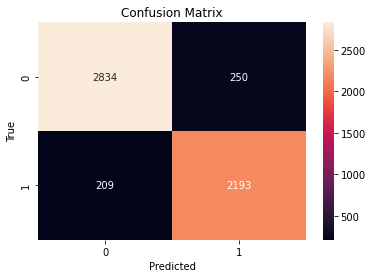

In [22]:
print('Model: Passive-Agressive Classifier')
print('Accuracy:',model12.score(x_test,y_test))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('AUC:',metrics.roc_auc_score(y_test,y_pred))
sn.heatmap(CM,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The scores are not bad but can be improved. Because this just the 'News Headline', so its not a sufficient data to do the sentiment analysis. The model might perform better when we use whole news for training-testing. 

# (ii) Using text as a feature instead of title

Here, we are going train-test the whole 'News', and see how the ML models perform here. We will us the ML models and evaluation metrics as used in the previous section.

In [83]:
df1 = df.copy()
#df1 = df1.sample(5000)
df1.reset_index(inplace=True)

In [49]:
corpus1 = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(str(word)) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [25]:
cv1 = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [26]:
x = cv1.fit_transform(corpus1).toarray()

In [28]:
Y = df.label
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.3,random_state=0)

### Naive Bayes

In [29]:
NB = MultinomialNB()
model2= NB.fit(X_train,Y_train)

In [30]:
model2.score(X_test,Y_test)

0.9017499088589136

In [31]:
Y_pred = model2.predict(X_test)
cm = metrics.confusion_matrix(Y_test,Y_pred)

Model: Multinomial Naive-Bayes Classifier
Accuracy: 0.9017499088589136
Precision: 0.9367088607594937
AUC: 0.8940162542887413


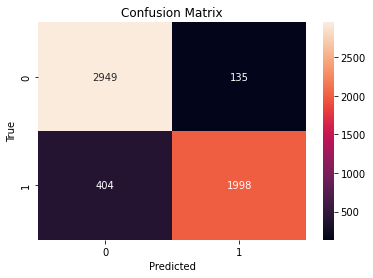

In [32]:
print('Model: Multinomial Naive-Bayes Classifier')
print('Accuracy:',model2.score(X_test,Y_test))
print('Precision:',metrics.precision_score(Y_test,Y_pred))
print('AUC:',metrics.roc_auc_score(Y_test,Y_pred))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The results are somewhat better but not much different. So, lets check if the other model performs better.

In [33]:
# PassiveAgressiveClassifier
Passive_Aggressive_model = PassiveAggressiveClassifier()
model22 = Passive_Aggressive_model.fit(X_train,Y_train)
Y_preD = model22.predict(X_test)
CM1 = metrics.confusion_matrix(Y_test, Y_preD)

Model: Passive-Agressive Classfier
Accuracy: 0.9502369668246445
Precision: 0.9429879317519767
AUC: 0.949478844369856


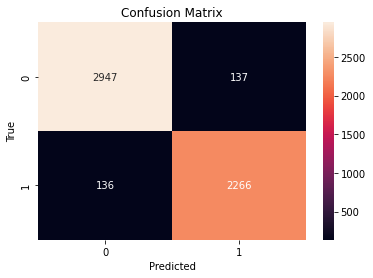

In [34]:
print('Model: Passive-Agressive Classfier')
print('Accuracy:',model22.score(X_test,Y_test))
print('Precision:',metrics.precision_score(Y_test,Y_preD))
print('AUC:',metrics.roc_auc_score(Y_test,Y_preD))
sn.heatmap(CM1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

So, the results are quite amazing. We are getting very scores, for all the evaluation metrics. Thus, this model can be used for deployment. But, before that, lets check the how Deep Leaning models like LSTM and BERT perform on this data.

# Using LSTM & Bi-Directional Neural Networks (Deep Learning)

In [57]:
y_f = df.label

In [48]:
y_f.shape

(18285,)

In [52]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

#(i) Using title for training the model

### LSTM

In [62]:
voc_size=5000

In [51]:
one_hot_rep = [one_hot(words,voc_size) for words in corpus] 

In [53]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_rep, padding = 'pre', maxlen=sent_length)

In [54]:
embedded_docs

array([[   0,    0,    0, ..., 2342, 3791, 3076],
       [   0,    0,    0, ..., 4512, 4373, 2964],
       [   0,    0,    0, ...,  820, 2645, 1261],
       ...,
       [   0,    0,    0, ..., 2392, 3568, 3350],
       [   0,    0,    0, ...,  269,  765,  108],
       [   0,    0,    0, ..., 4478,   13, 1108]], dtype=int32)

In [55]:
embedding_vec_features = 40

In [107]:
# LSTM
model = Sequential()
model.add(Embedding(voc_size,embedding_vec_features,input_length=sent_length))
model.add(LSTM(100))
'''model.add(LSTM(100))
model.add(LSTM(64))'''
model.add(Dropout(0.4))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3) )
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 258,951
Trainable params: 258,951
Non-tr

In [70]:
import numpy as np
x_final = np.array(embedded_docs)
y_final = np.array(y_f)

In [71]:
xf_train,xf_test,yf_train,yf_test = train_test_split(x_final,y_final,test_size=0.3,random_state=0)

In [73]:
model.fit(xf_train,yf_train,validation_data=(xf_test,yf_test),epochs=10,batch_size=64)

Epoch 1/10
200/200 [==============================] - 10s 49ms/step - loss: 0.0687 - accuracy: 0.9809 - val_loss: 0.3012 - val_accuracy: 0.9213
Epoch 2/10
200/200 [==============================] - 10s 49ms/step - loss: 0.0527 - accuracy: 0.9889 - val_loss: 0.3690 - val_accuracy: 0.9176
Epoch 3/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0431 - accuracy: 0.9909 - val_loss: 0.4913 - val_accuracy: 0.9156
Epoch 4/10
200/200 [==============================] - 9s 46ms/step - loss: 0.0321 - accuracy: 0.9951 - val_loss: 0.5977 - val_accuracy: 0.9171
Epoch 5/10
200/200 [==============================] - 9s 44ms/step - loss: 0.0975 - accuracy: 0.9827 - val_loss: 0.4125 - val_accuracy: 0.9054
Epoch 6/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.4695 - val_accuracy: 0.9141
Epoch 7/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0279 - accuracy: 0.9959 - val_loss: 0.5716 - val_accuracy: 0.91

Using an **Activation function** as **'tanh'** will give all values in the range **[-1,1]**. So, we have to set a thersold of **0**, thus values greater than **0** will be classified as **1** and vice versa. 

In [74]:
yf_pred = model.predict(xf_test)
classes_x=np.where(yf_pred > 0, 1,0)

172/172 [==============================] - 2s 9ms/step


Model: LSTM
Accuracy: 0.915056507473569
Precision: 0.8647324792765637
AUC: 0.9195232626075762


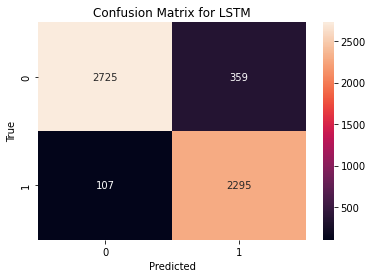

In [76]:
print('Model: LSTM')
print('Accuracy:', metrics.accuracy_score(yf_test,classes_x))
print('Precision:',metrics.precision_score(Y_test,classes_x))
print('AUC:',metrics.roc_auc_score(Y_test,classes_x))
Cm = metrics.confusion_matrix(yf_test,classes_x)
sn.heatmap(Cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LSTM')
plt.show()

The results are quite similar to that of ML models, lets look at the performance of the Bi-Direction LSTM.

### Bi-Directional LSTM

In [51]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [78]:
# Bidirectional LSTM
model111 = Sequential()
model111.add(Embedding(voc_size,embedding_vec_features,input_length=sent_length))
model111.add(Bidirectional(LSTM(100)))
model111.add(Dropout(0.3))
model111.add(Dense(25,activation='relu'))
model111.add(Dropout(0.3))
model111.add(Dense(1, activation='tanh'))
model111.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [79]:
model111.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 25)                5025      
                                                                 
 dropout_7 (Dropout)         (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                      

In [80]:
model111.fit(xf_train,yf_train,validation_data=(xf_test,yf_test),epochs=10,batch_size=64 )

Epoch 1/10
200/200 [==============================] - 23s 84ms/step - loss: 0.3843 - accuracy: 0.8319 - val_loss: 0.2048 - val_accuracy: 0.9223
Epoch 2/10
200/200 [==============================] - 15s 74ms/step - loss: 0.1684 - accuracy: 0.9392 - val_loss: 0.2098 - val_accuracy: 0.9200
Epoch 3/10
200/200 [==============================] - 15s 73ms/step - loss: 0.1368 - accuracy: 0.9547 - val_loss: 0.2476 - val_accuracy: 0.9189
Epoch 4/10
200/200 [==============================] - 18s 91ms/step - loss: 0.0936 - accuracy: 0.9707 - val_loss: 0.2662 - val_accuracy: 0.9191
Epoch 5/10
200/200 [==============================] - 23s 113ms/step - loss: 0.0761 - accuracy: 0.9776 - val_loss: 0.4003 - val_accuracy: 0.9182
Epoch 6/10
200/200 [==============================] - 16s 81ms/step - loss: 0.0839 - accuracy: 0.9745 - val_loss: 0.3099 - val_accuracy: 0.9165
Epoch 7/10
200/200 [==============================] - 14s 69ms/step - loss: 0.0586 - accuracy: 0.9857 - val_loss: 0.4999 - val_accuracy

In [83]:
Y_pred = model.predict(xf_test)
classes_X1 = np.where(y_pred>0,1,0)

172/172 [==============================] - 2s 13ms/step


Model: Bidirectional LSTM
Accuracy: 0.9017499088589136
Precision: 0.8733466933867735
AUC: 0.902348183690418


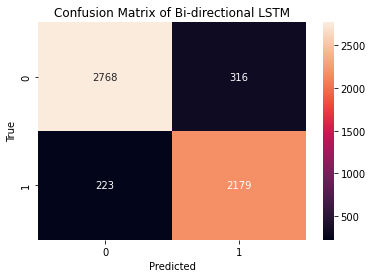

In [85]:
print('Model: Bidirectional LSTM')
print('Accuracy:', metrics.accuracy_score(yf_test,classes_X1))
print('Precision:',metrics.precision_score(Y_test,classes_X1))
print('AUC:',metrics.roc_auc_score(Y_test,classes_X1))
Cm = metrics.confusion_matrix(yf_test,classes_X1)
sn.heatmap(Cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Bi-directional LSTM')
plt.show()

The results are not that impressive, not lets train-test using full 'News' as data.

#Using text for training-testing the model

In [53]:
one_hot_R = [one_hot(word,150000) for word in corpus1]

In [88]:
len(max(corpus1, key=len))

72006

In [89]:
len(max(corpus,key=len))

299

In [54]:
sent_length1 = 4820
embedded_doc = pad_sequences(one_hot_R, padding = 'pre', maxlen=sent_length1)

In [58]:
import numpy as np
X_final = np.array(embedded_doc)
Y_final = np.array(y_f)

In [60]:
from sklearn.model_selection import train_test_split
Xf_train,Xf_test,Yf_train,Yf_test = train_test_split(X_final,Y_final,test_size=0.3,random_state=0)

In [63]:
# LSTM
embedding_vec_features = 4000
model21 = Sequential()
model21.add(Embedding(voc_size,embedding_vec_features,input_length=sent_length1))
model21.add(LSTM(100))
#model21.add(Dropout(0.3))
#model21.add(Dense(25,activation='relu'))
#model21.add(Dropout(0.3))
model21.add(Dense(1, activation='tanh'))
model21.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [64]:
model21.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4820, 4000)        20000000  
                                                                 
 lstm (LSTM)                 (None, 100)               1640400   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 21,640,501
Trainable params: 21,640,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model21.fit(Xf_train,Yf_train,validation_data=(Xf_test,Yf_test),epochs=10,batch_size=20),

Epoch 1/10
640/640 [==============================] - 391s 611ms/step - loss: 0.4409 - accuracy: 0.8121 - val_loss: 0.5457 - val_accuracy: 0.7616
Epoch 2/10
640/640 [==============================] - 416s 650ms/step - loss: 0.4232 - accuracy: 0.8200 - val_loss: 0.5443 - val_accuracy: 0.7639
Epoch 3/10
640/640 [==============================] - 393s 614ms/step - loss: 0.4138 - accuracy: 0.8207 - val_loss: 0.5512 - val_accuracy: 0.7734
Epoch 4/10
640/640 [==============================] - 392s 613ms/step - loss: 0.4014 - accuracy: 0.8298 - val_loss: 0.5337 - val_accuracy: 0.7663
Epoch 5/10
640/640 [==============================] - 392s 613ms/step - loss: 0.3898 - accuracy: 0.8321 - val_loss: 0.6076 - val_accuracy: 0.7734
Epoch 6/10
640/640 [==============================] - 392s 613ms/step - loss: 0.3777 - accuracy: 0.8436 - val_loss: 0.5494 - val_accuracy: 0.7749
Epoch 7/10
640/640 [==============================] - 392s 613ms/step - loss: 0.3723 - accuracy: 0.8473 - val_loss: 0.5586 -

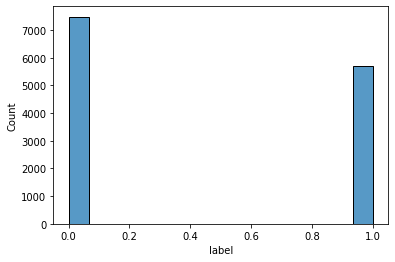

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.histplot(df.label)
plt.show()

In [ ]:
import pickle
Fake_news_classifier_PAC = open('Fake_news_classifier.pkl','wb')
pickle.dump(model22,Fake_news_classifier_PAC)
Fake_news_classifier_PAC.close()